# <center> How does legal drug use affect other social factors? </center>

### Group Members:
+ Smit
+ Brandon
+ Neil


In [1]:
import pandas as pd
import seaborn

In [2]:
#Save the data into the dataframe
df = pd.read_csv('BCHI-dataset_2019-03-04.csv')

In [3]:
#Was Used to view all the categories to find good factors to measure.
ce_cat = df.groupby('Indicator')
ce_cat = set(j[0] for j in ce_cat)




In [4]:
# Single out Drug Use Factors

currentSmoker = df.loc [ df['Indicator'] == 'Percent of Adults Who Currently Smoke' ]
bingeDrinkers = df.loc [ df['Indicator'] == 'Percent of Adults Who Binge Drank' ]
opiODRate = df.loc [ df['Indicator'] == 'Opioid-Related Unintentional Drug Overdose Mortality Rate (Age-Adjusted; Per 100,000 people)' ]
hsSmokers = df.loc [ df['Indicator'] == 'Percent of High School Students Who Currently Smoke' ]
hsDrinkers = df.loc [ df['Indicator'] == 'Percent of High School Studen' ]


In [5]:
# Drops collumns that are not currently useful to allow for a more 
# managable dataframe.
moreManagable =  df.drop(columns = ['BCHC Requested Methodology', 'Source', 'Methods', 'Notes', '90% Confidence Level - Low',
                                    '90% Confidence Level - High', '95% Confidence Level - Low', '95% Confidence Level - High'])


In [6]:
#Gets a series of all cities in original dataframe

indCities = moreManagable.groupby('Place')
indCities = set(j[0] for j in indCities)
indCities = sorted(indCities)
pd.Series(indCities)

0                           Austin, TX
1                        Baltimore, MD
2                           Boston, MA
3                        Charlotte, NC
4                          Chicago, Il
5                        Cleveland, OH
6                         Columbus, OH
7                           Dallas, TX
8                           Denver, CO
9                          Detroit, MI
10     Fort Worth (Tarrant County), TX
11                         Houston, TX
12    Indianapolis (Marion County), IN
13                     Kansas City, MO
14        Las Vegas (Clark County), NV
15                      Long Beach, CA
16                     Los Angeles, CA
17       Miami (Miami-Dade County), FL
18                     Minneapolis, MN
19                   New York City, NY
20        Oakland (Alameda County), CA
21                    Philadelphia, PA
22                         Phoenix, AZ
23     Portland (Multnomah County), OR
24                     San Antonio, TX
25                San Die

In [7]:
#Creates a condition used to locate certain data in the dataframe.

smoker_condition = (moreManagable['Indicator'] == 'Percent of Adults Who Currently Smoke' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
drinker_condition = ( moreManagable['Indicator'] == 'Percent of Adults Who Binge Drank') & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
od_condition = (moreManagable['Indicator'] == 'Opioid-Related Unintentional Drug Overdose Mortality Rate (Age-Adjusted; Per 100,000 people)' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
hs_smokers_condition = ( moreManagable['Indicator'] == 'Percent of High School Students Who Currently Smoke') & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
hs_drinkers_condition = ( moreManagable['Indicator'] == 'Percent of High School Students Who Binge Drank' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')

gun_er_condition = (moreManagable['Indicator'] == 'Firearm-Related Emergency Department Visit Rate (Age-Adjusted; Per 10,000 people)' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
homicide_condition = ( moreManagable['Indicator'] == 'Homicide Rate (Age-Adjusted; Per 100,000 people)' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
teen_mom_condition = (moreManagable['Indicator'] == 'Percent of Mothers Under Age 20' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
suicide_condition = ( moreManagable['Indicator'] == 'Suicide Rate (Age-Adjusted; Per 100,000 people)') & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')
unemployed_condition = ( moreManagable['Indicator'] == 'Percent Unemployed' ) & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All') 
obese_condition = ( moreManagable['Indicator'] == 'Percent of Adults Who Are Obese') & (moreManagable['Sex'] == 'Both') & (moreManagable['Race/Ethnicity'] == 'All')

In [8]:
#Saves the desired data into temporary values
asmok = moreManagable.loc[ smoker_condition ]
adrink = moreManagable.loc[ drinker_condition ]
opi = moreManagable.loc[ od_condition ]
hsmok = moreManagable.loc[ hs_smokers_condition ]
hsdrink = moreManagable.loc[ hs_drinkers_condition ]


gun_er = moreManagable.loc[ gun_er_condition ]
hom = moreManagable.loc[ homicide_condition ]
teen_mom = moreManagable.loc[ teen_mom_condition ]
suic = moreManagable.loc[ suicide_condition ]
ue = moreManagable.loc[ unemployed_condition ]
ob = moreManagable.loc[ obese_condition ]

In [9]:
#Makes a custom dataframe with the columns we wanted. 
my_df = pd.DataFrame(columns = ['HS Smokers', 'HS Binge Drinking', 'Opiod ODs', 'A Smokers', 'A Binge Drinking', 'Gun ER visits',
                               'Homicide Rate', 'Teen Mom Rate', 'Suicide Rate', 'Unemployed', 'Obesity Rate'])
my_df

,HS Smokers,HS Binge Drinking,Opiod ODs,A Smokers,A Binge Drinking,Gun ER visits,Homicide Rate,Teen Mom Rate,Suicide Rate,Unemployed,Obesity Rate


In [10]:
#Adds All the Cities to the dataframe.

my_df['Place'] = indCities
my_df

,HS Smokers,HS Binge Drinking,Opiod ODs,A Smokers,A Binge Drinking,Gun ER visits,Homicide Rate,Teen Mom Rate,Suicide Rate,Unemployed,Obesity Rate,Place
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Austin, TX"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Baltimore, MD"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Boston, MA"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Charlotte, NC"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chicago, Il"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland, OH"
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Columbus, OH"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dallas, TX"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Denver, CO"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Detroit, MI"


In [11]:
# Groups the Indicator data by city and takes the mean of the years selected. 
asmokg = asmok.groupby('Place').mean()
adrinkg = adrink.groupby('Place').mean()
opig = opi.groupby('Place').mean()
hssmokg = hsmok.groupby('Place').mean()
hsdrinkg = hsdrink.groupby('Place').mean()
gun_erg = gun_er.groupby('Place').mean()
homg = hom.groupby('Place').mean()
teen_momg = teen_mom.groupby('Place').mean()
suicg = suic.groupby('Place').mean()
ueg = ue.groupby('Place').mean()
obg = ob.groupby('Place').mean()

##### Now we need to populate our custom dataframe with data which we isolated in the previous step. 

In [12]:
for i1, r1 in hssmokg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['HS Smokers'] = r1['Value']
            
for i1, r1 in hsdrinkg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['HS Binge Drinking'] = r1['Value']

for i1, r1 in asmokg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['A Smokers'] = r1['Value']
            
for i1, r1 in adrinkg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['A Binge Drinking'] = r1['Value']

In [13]:
for i1, r1 in gun_erg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Gun ER visits'] = r1['Value']

for i1, r1 in homg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Homicide Rate'] = r1['Value']
            
for i1, r1 in teen_momg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Teen Mom Rate'] = r1['Value']
            
for i1, r1 in suicg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Suicide Rate'] = r1['Value']
            
for i1, r1 in ueg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Unemployed'] = r1['Value']
            
for i1, r1 in obg.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Obesity Rate'] = r1['Value']

In [14]:
for i1, r1 in opig.iterrows():
    for i2, r2 in my_df.iterrows():
        if r2['Place'] == i1:
            r2['Opiod ODs'] = r1['Value']
            

In [15]:
# At this point, we can see the custom dataframe we have made.
my_df

,HS Smokers,HS Binge Drinking,Opiod ODs,A Smokers,A Binge Drinking,Gun ER visits,Homicide Rate,Teen Mom Rate,Suicide Rate,Unemployed,Obesity Rate,Place
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Austin, TX"
1,7,12.4,NaN,23.1667,18.2,NaN,NaN,NaN,NaN,12.8,32.4,"Baltimore, MD"
2,6.43333,14.1333,7.44,17.9,25.0333,2.35,6.95,NaN,6.21667,8.66667,21.3,"Boston, MA"
3,11.4,15.7333,NaN,15.54,15.6833,NaN,NaN,NaN,NaN,NaN,26.54,"Charlotte, NC"
4,12.15,18.65,NaN,21.55,29,4.6,14.4333,NaN,6.65,12.4333,28,"Chicago, Il"
5,NaN,NaN,NaN,NaN,NaN,NaN,25.7,NaN,9.84,18.6333,NaN,"Cleveland, OH"
6,NaN,NaN,12.8571,27.9833,19.15,NaN,13.3714,NaN,12.4,NaN,32.5667,"Columbus, OH"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.63333,NaN,"Dallas, TX"
8,8.45,19.6,7.1,18.8667,26.2167,0.933333,6.37143,NaN,17.0143,5.93333,19,"Denver, CO"
9,5.6,8.7,NaN,30.85,17.15,NaN,42.75,NaN,8.5,24.8667,37.55,"Detroit, MI"


## <center> Finding Correlations </center>

In [16]:
# import libraries needed for linear regression.
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
linRegression = LinearRegression()

#Import library needed for decision tree regression. 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
treeReg = DecisionTreeRegressor(max_depth=4)

### Comparing Homicide Rate to Gun ER visits.

In [17]:
#Isolate columns that we want to use and drop city if one of the values is null.
d = my_df.drop(columns = ['A Smokers','A Binge Drinking','Obesity Rate','HS Smokers', 'HS Binge Drinking', 'Opiod ODs',
                               'Teen Mom Rate', 'Suicide Rate', 'Unemployed'])
d1 = d.dropna()
#d1

In [18]:
X = d1[['Homicide Rate']]
y = d1['Gun ER visits']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -20.991215441438992
Linear Regression Score:  0.4053728899429477


##### ^Homicide Rate and Gun ER visits are intuitively likely to be correlated and we obtained the linear regression score above.^

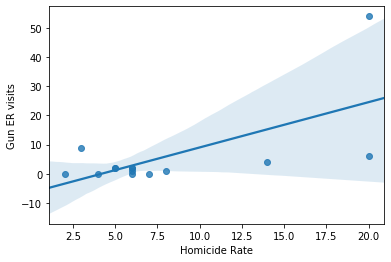

In [19]:
d2 = d1[['Homicide Rate','Gun ER visits']].astype(int)
seaborn.regplot(x='Homicide Rate',y= 'Gun ER visits', data= d2)

### Comparing Adult Binge Drinking and Cigarette Smoking to Homicide Rate.

In [20]:
#Isolate columns that we want to use and drop city if one of the values is null.
a = my_df.drop(columns = ['HS Smokers', 'HS Binge Drinking', 'Opiod ODs', 'Gun ER visits',
                               'Teen Mom Rate', 'Suicide Rate', 'Unemployed', 'Obesity Rate'])
a1 = a.dropna()
#a1


In [21]:
X = a1[['A Binge Drinking', 'A Smokers']]
y = a1['Homicide Rate']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -0.475364627566273
Linear Regression Score:  0.5020991088724307


#### This seems like a relatively strong relations between legal drug use and homicide. This relationship is ever stronger than Gun ER visits and Homicide Rate.

+ Estimates from the National Crime Victimization Survey indicate that victims of about 3 million violent crimes each year, or about a quarter of all violent crimes, perceived the offenders to have been drinking. (Bureau of Justice Statistics)

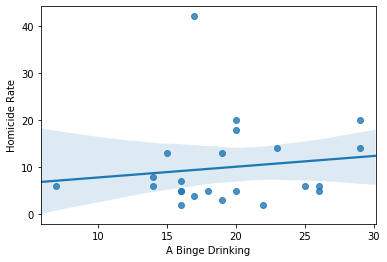

In [22]:
a2 = a1[['A Binge Drinking', 'A Smokers','Homicide Rate']].astype(int)
seaborn.regplot(x='A Binge Drinking',y= 'Homicide Rate', data= a2)

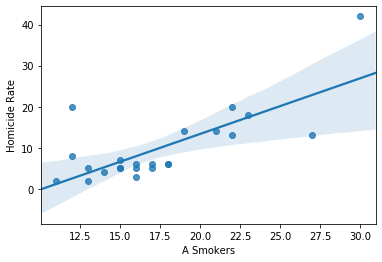

In [23]:
seaborn.regplot(x='A Smokers',y= 'Homicide Rate', data= a2)

### Comparing Binge Drinking Rate to Opiod Overdose Rate.

In [24]:
#Isolate columns that we want to use and drop city if one of the values is null.
b = my_df.drop(columns = ['HS Smokers', 'HS Binge Drinking', 'Homicide Rate', 'Gun ER visits',
                               'Teen Mom Rate', 'Suicide Rate', 'Unemployed', 'Obesity Rate'])
b1 = b.dropna()
#b1


In [25]:
X = b1[['A Binge Drinking']]
y = b1['Opiod ODs']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -2.3594551037916784
Linear Regression Score:  0.0010994910876630515


#### The low correlation here is surprising because you might that cities where more people who drink alcohol at excessive levels would also use Opiods to excessive levels which can cause death. 

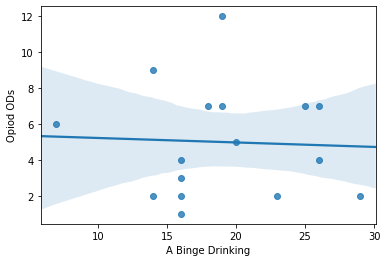

In [26]:
b2 = b1[['A Binge Drinking','Opiod ODs']].astype(int)
seaborn.regplot(x='A Binge Drinking',y= 'Opiod ODs', data= b2)

### Comparing Binge Drinking and Cigarette Smoking to Obesity in Adults.

In [27]:
#Isolate columns that we want to use and drop city if one of the values is null.
c = my_df.drop(columns = ['HS Smokers', 'HS Binge Drinking', 'Opiod ODs', 'Gun ER visits',
                               'Teen Mom Rate', 'Suicide Rate', 'Unemployed','Homicide Rate'])
c1 = c.dropna()
#c1



In [28]:
X = c1[['A Binge Drinking', 'A Smokers']]
y = c1['Obesity Rate']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -0.020789124969056976
Linear Regression Score:  0.5201199898060815


#### These Indicators are strongly correlated. This could possibly be because both are conditions where short term gratification causes long-term harm. 

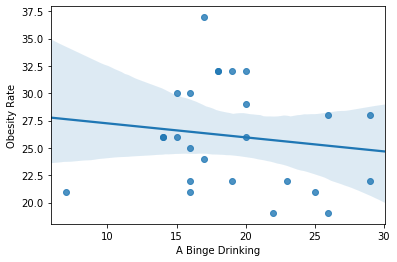

In [31]:
c2 = c1[['A Binge Drinking', 'A Smokers','Obesity Rate']].astype(int)
seaborn.regplot(x='A Binge Drinking',y= 'Obesity Rate', data= c2)

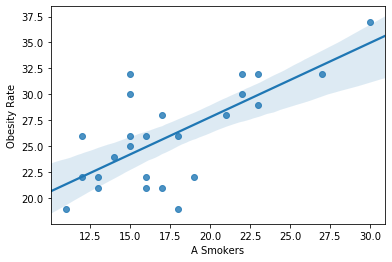

In [32]:
seaborn.regplot(x='A Smokers',y= 'Obesity Rate', data= c2)

### Comparing High School Smoking and High School Binge Drinking to Adult Unemployment.

In [33]:
#Isolate columns that we want to use and drop city if one of the values is null.
e = my_df.drop(columns = ['A Smokers','A Binge Drinking','Obesity Rate', 'Opiod ODs', 'Gun ER visits',
                               'Teen Mom Rate', 'Suicide Rate','Homicide Rate'])
e1 = e.dropna()
#e1



In [34]:
X = e1[['HS Smokers', 'HS Binge Drinking']]
y = e1['Unemployed']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -6.012056354109181
Linear Regression Score:  0.19328155018873439


#### There is a moderately high correlation with the use of legal drugs in highschool and unemployment in adults. 

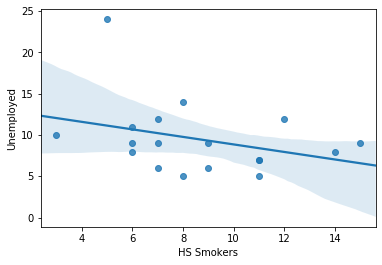

In [35]:
e2 = e1[['HS Smokers', 'HS Binge Drinking','Unemployed']].astype(int)
seaborn.regplot(x='HS Smokers',y= 'Unemployed', data= e2)

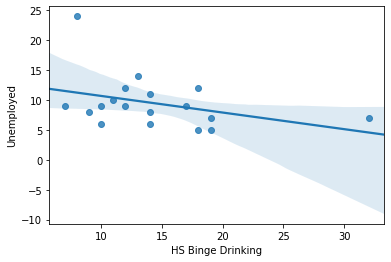

In [36]:
seaborn.regplot(x='HS Binge Drinking',y= 'Unemployed', data= e2)

### Comparing Binge Drinking and Smoking to Suicide Rate.

In [37]:
#Isolate columns that we want to use and drop city if one of the values is null.
f = my_df.drop(columns = ['HS Smokers', 'HS Binge Drinking', 'Obesity Rate','Gun ER visits'
                            ,'Homicide Rate','Opiod ODs','Teen Mom Rate', 'Unemployed'])
f1 = f.dropna()
#f1



In [38]:
X = f1[['A Smokers','A Binge Drinking']]
y = f1['Suicide Rate']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -0.4239906723200184
Linear Regression Score:  0.016767633123727865


#### This low correlation is also slightly surprising because one might think that the same cities with high suicide rate (and by extension high amount of emotional suffering), would have more people that cope using legal drugs. 

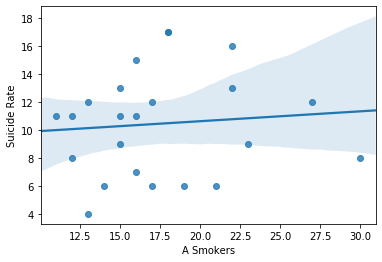

In [39]:
f2 = f1[['A Smokers', 'A Binge Drinking','Suicide Rate']].astype(int)
seaborn.regplot(x='A Smokers',y= 'Suicide Rate', data= f2)

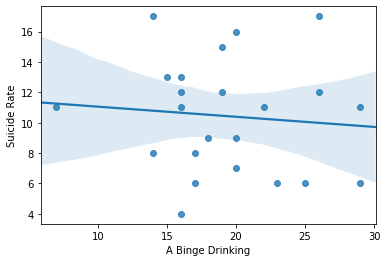

In [40]:
seaborn.regplot(x='A Binge Drinking',y= 'Suicide Rate', data= f2)

### Comparing Adult Binge Drinking to High School Binge Drinking

In [43]:
#Isolate columns that we want to use and drop city if one of the values is null.
g = my_df.drop(columns = ['A Smokers', 'HS Smokers', 'Obesity Rate','Gun ER visits'
                            ,'Homicide Rate','Opiod ODs','Teen Mom Rate', 'Unemployed', 'Suicide Rate'])
g1 = g.dropna()
#n1


In [44]:
X = g1[['A Binge Drinking']]
y = g1['HS Binge Drinking']
linRegression.fit(X,y)
result = cross_validate(linRegression, X, y, cv=3)

print("Cross Validation Test Score: ", result['test_score'].mean())
print("Linear Regression Score: ", linRegression.score(X, y))

Cross Validation Test Score:  -0.40633681125592996
Linear Regression Score:  0.0009866507909870315


#### Another surprisingly low correlation between two Indicators that you might think to be highly correlated.

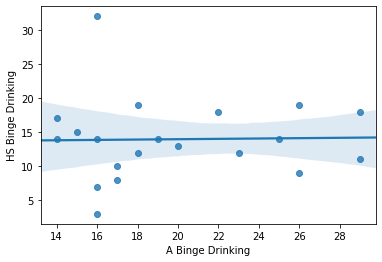

In [45]:
g2 = g1[['HS Binge Drinking', 'A Binge Drinking']].astype(int)
seaborn.regplot(x='A Binge Drinking',y= 'HS Binge Drinking', data= g2)

# <center> Conclusions: </center>

## From the tests which we ran, it seems to show that a slight to strong correlation to the use of legal drugs and the Indicators that we meaured. 

## This means that the cities who face more of the social issues such as high homicide rate, high obesity rate, and high unemployment have more legal drug use. 

## One assumption to avoid is that the use of legal drugs causes these social issues. It may be more probable that cities dealing with these issues are more likely to cope with legal drugs.